<a href="https://colab.research.google.com/github/seanb7/GEOL-450/blob/main/Seismic_Reflection_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cbook import get_sample_data
from matplotlib.colors import LightSource

In [2]:
t = np.array ([1.01, 1.03, 1.07, 1.11, 1.17, 1.25, 1.33])
x = np.array ([0.5, 1, 1.5, 2, 2.5, 3, 3.5])

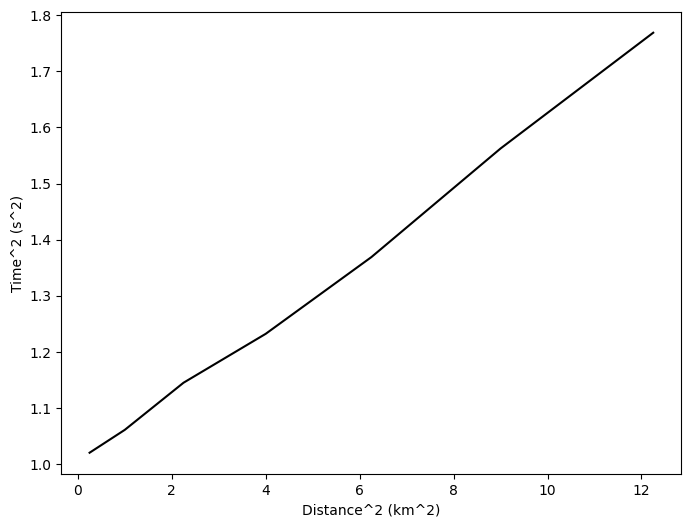

In [5]:
fig, ax = plt.subplots()
ax.plot ( x**2, t**2, 'k-')
plt.xlabel('Distance^2 (km^2)')
plt.ylabel('Time^2 (s^2)')
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

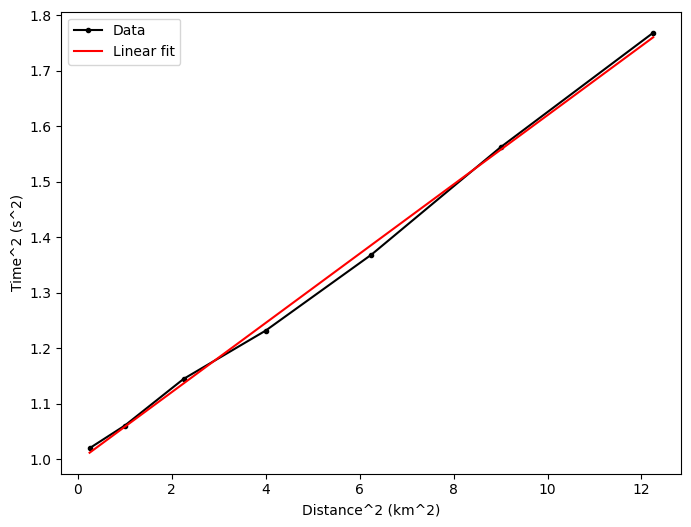

In [4]:
m, b = np.polyfit(x**2, t**2, 1)

fig, ax = plt.subplots()
ax.plot ( x**2, t**2, 'k.-', label = 'Data')
ax.plot ( x**2, m*(x**2) + b, 'r-', label = 'Linear fit')
plt.xlabel('Distance^2 (km^2)')
plt.ylabel('Time^2 (s^2)')
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.legend()
plt.show()

In [6]:
# Calcutlate Depth and Velocity
# The slope m = 1/V1**2
V1 = np.sqrt(1/m)
print(V1)

4.003313280587215


In [7]:
# the y-intercept, b = 4*(z**2)/V1**2

z = np.sqrt((b * (V1**2)) / 4)
print(z)

1.9979958948107737


In [23]:
# Problem 2
# Water Layer
rho = 1030
nu = 0.1
mu = 0
K = 0.23e10
z = 2.5e3

Water_Vp = np.sqrt(((4/3) * mu + K) / rho)

# Sediment Layer
rho = 1500
nu = 0.25
mu = 0.8
K = 1.33
z = 2.5e3

Sediment_Vp = np.sqrt(((4/3) * mu + K) / rho)

# Extrusive Pillow Lavas (Top Layer Baslts)
rho = 2500
nu = 0.3
mu = 2.25
K = 5.17
z = 2.5e3

PillowLavas_Vp = np.sqrt(((4/3) * mu + K) / rho)

# Intrusive Sheeted Dikes (Bottom Layer Basalts)
rho = 2700
nu = 0.29
mu = 3.3
K = 6.8
z = 2.5e3

Dikes_Vp = np.sqrt(((4/3) * mu + K) / rho)

# Gabbros
rho = 2900
nu = 0.29
mu = 5.9
K = 12.0
z = 2.5e3

Gabbros_Vp = np.sqrt(((4/3) * mu + K) / rho)

# Mantle - Peridotites
rho = 3300
nu = 0.25
mu = 8.25
K = 14.4
z = 2.5e3

Mantle_Vp = np.sqrt(((4/3) * mu + K) / rho)

print(Water_Vp)
print(Sediment_Vp)
print(PillowLavas_Vp)
print(Dikes_Vp)
print(Gabbros_Vp)
print(Mantle_Vp)

1494.3258375394116
0.03997221257045671
0.05716642371182581
0.06440611887195306
0.08276819867946673
0.08773237542076298


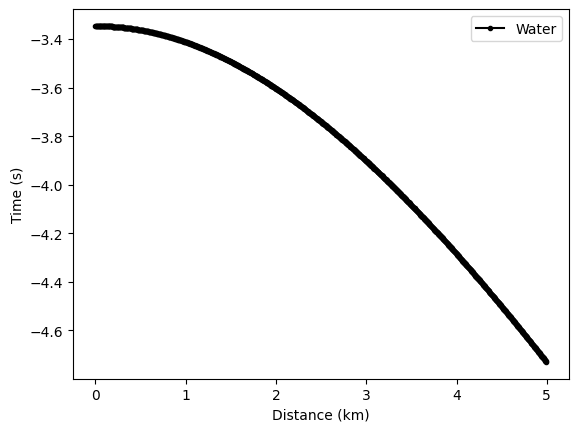

In [32]:
# Plot Time vs Distance
x = np.arange(0,5000,5)
t = np.sqrt(((4 * z**2) / Water_Vp**2) + ((x**2) / (Water_Vp**2)))

# Plot Seawater Layer
plt.plot ( x/1e3, -t, 'k.-', label = 'Water')
plt.xlabel('Distance (km)')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

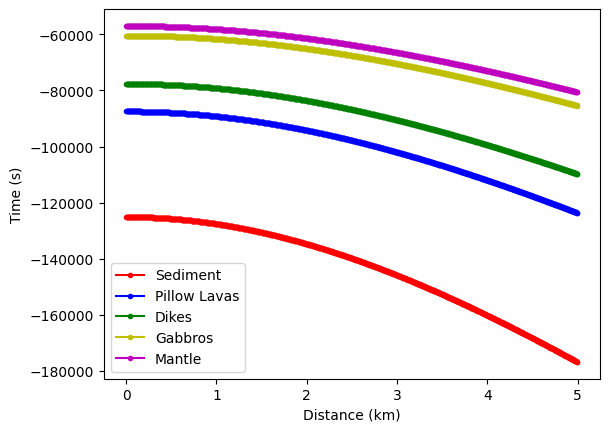

In [33]:
# Plot Crust Layers
x = np.arange(0,5000,5)
t2 = np.sqrt(((4 * z**2) / Sediment_Vp**2) + ((x**2) / (Sediment_Vp**2)))
t3 = np.sqrt(((4 * z**2) / PillowLavas_Vp**2) + ((x**2) / (PillowLavas_Vp**2)))
t4 = np.sqrt(((4 * z**2) / Dikes_Vp**2) + ((x**2) / (Dikes_Vp**2)))
t5 = np.sqrt(((4 * z**2) / Gabbros_Vp**2) + ((x**2) / (Gabbros_Vp**2)))
t6 = np.sqrt(((4 * z**2) / Mantle_Vp**2) + ((x**2) / (Mantle_Vp**2)))

plt.plot ( x/1e3, -t2, 'r.-', label = 'Sediment')
plt.plot ( x/1e3, -t3, 'b.-', label = 'Pillow Lavas')
plt.plot ( x/1e3, -t4, 'g.-', label = 'Dikes')
plt.plot ( x/1e3, -t5, 'y.-', label = 'Gabbros')
plt.plot ( x/1e3, -t6, 'm.-', label = 'Mantle')
plt.xlabel('Distance (km)')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

# How would you design a survey test whether this is assumed structure for the oceanic crust is correct?


# How would you position your shots and recievers?

Recievers whould be placed ever 5km away from eachother

# How will you run the survey to determine whether there are dipping interfaces?

Reverse the travel time curve to show the dipping interface.